In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import random

In [2]:
#Read single cell data and TF list
path_data = '/Users/gonzalomoraleschaya/University of Oregon Dropbox/Gonzalo Morales Chaya/Desktop/Class/DataScience_Bootcamp/Project/Data/T2.h5ad'
TFs_path = '/Users/gonzalomoraleschaya/University of Oregon Dropbox/Gonzalo Morales Chaya/Desktop/Class/DataScience_Bootcamp/Project/Data/TFs.txt'
data = sc.read_h5ad(path_data) 
TFs = pd.read_csv(TFs_path, sep='\t')
# This is a list of transcription factors that we will use to anlalyze the data. The main idea is that these TFs are 
# correlated with the expression of the genes in the data. We will use this list to filter the data and find the TFs 
# that are correlated with the genes in the data. The TFs are stored in a dataframe and we will convert it to a list. 
# The list is stored in the variable TFs.
TFs = TFs['SYMBOL'].tolist()

# AnnData is a package that allows us to work with single cell data. It uses the package called scanpy
# to store the data in a format that is easy to work with. The data is stored in a sparse matrix format
# and can be accessed using the .X attribute. For example:
# We will unlikely use these features, but just so you understand:
print(data.X)
# We can also access the data using the .obs and .var attributes. The .obs attribute contains the
# metadata for the cells and the .var attribute contains the metadata for the genes. For example:
print(data.obs)
print(data.var)

# For now (until we meet) I suggest you look into:
# 1. Briefly what single cell RNA sequencing is and how it works.
# 2. How to use scanpy
# 3. Explore the data just a bit 

# Export cell-by-gene matrix
data_matrix = pd.DataFrame(data.X.toarray(), index=data.obs_names, columns=data.var_names)
data_matrix = data_matrix.loc[:, data_matrix.std() != 0]
tf_matrix = data_matrix.loc[:, data_matrix.columns.isin(TFs)]
gene_matrix = data_matrix.loc[:, ~data_matrix.columns.isin(TFs)]



  (37, 0)	1.6931459986858783
  (302, 0)	2.708423614101321
  (372, 0)	2.074296106702192
  (556, 0)	2.0616225423999195
  (557, 0)	1.8817266540582835
  (638, 0)	1.613933023551033
  (644, 0)	2.1187396817263315
  (732, 0)	3.5011736533387094
  (778, 0)	3.4419564582926556
  (893, 0)	2.0730801416383056
  (948, 0)	2.7805936620987888
  (1175, 0)	2.3790200045268763
  (1275, 0)	1.525430521246843
  (1358, 0)	1.8453777063174803
  (1381, 0)	1.7193414598044636
  (1432, 0)	2.028235094311316
  (1601, 0)	1.8548650234579704
  (1609, 0)	2.0773443720891125
  (1689, 0)	1.9767033448251121
  (1708, 0)	1.7246255025099255
  (1765, 0)	1.9995451621674152
  (1785, 0)	1.6024348597803908
  (1806, 0)	3.1753744029075848
  (2048, 0)	1.5095844702760752
  (2122, 0)	3.667858527740813
  :	:
  (39099, 21769)	0.789331104412867
  (39301, 21769)	0.9130331566319898
  (39399, 21769)	1.4414564126099005
  (40033, 21769)	0.7049009475429949
  (40156, 21769)	0.7241797327401437
  (40319, 21769)	1.7599797232086738
  (40582, 21769)	1.077

/var/folders/xf/6h4w082s30j6bk4vdml6mdm40000gn/T/ipykernel_57529/2719616876.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=activators, x='TF', order=activators['TF'].value_counts().index, palette='viridis')


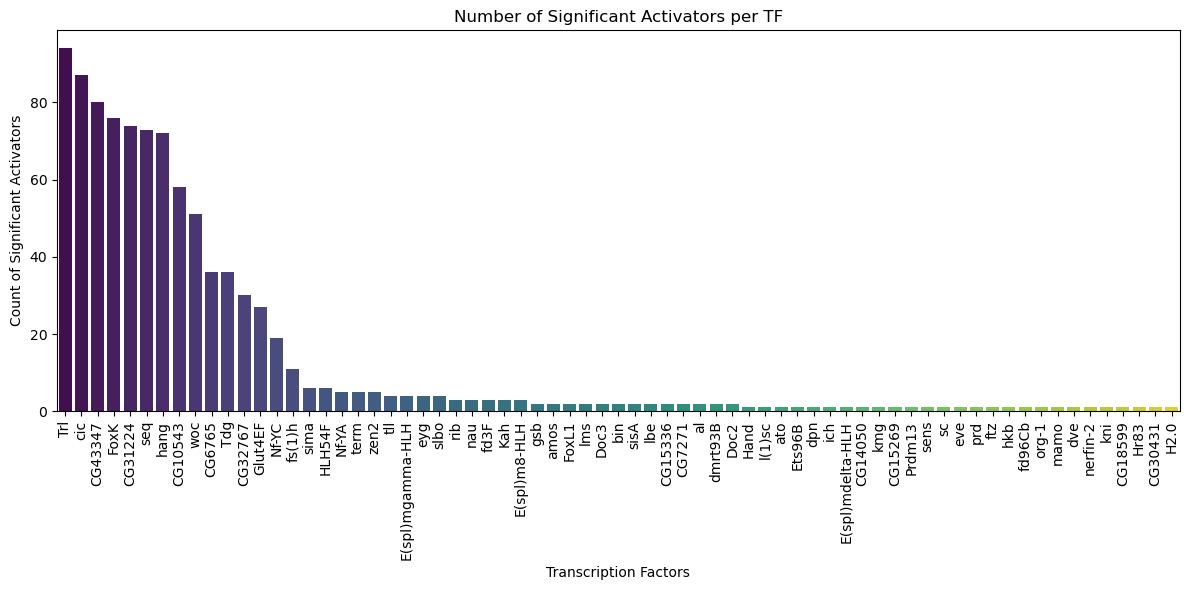

/var/folders/xf/6h4w082s30j6bk4vdml6mdm40000gn/T/ipykernel_57529/2719616876.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=repressors, x='TF', order=repressors['TF'].value_counts().index, palette='magma')


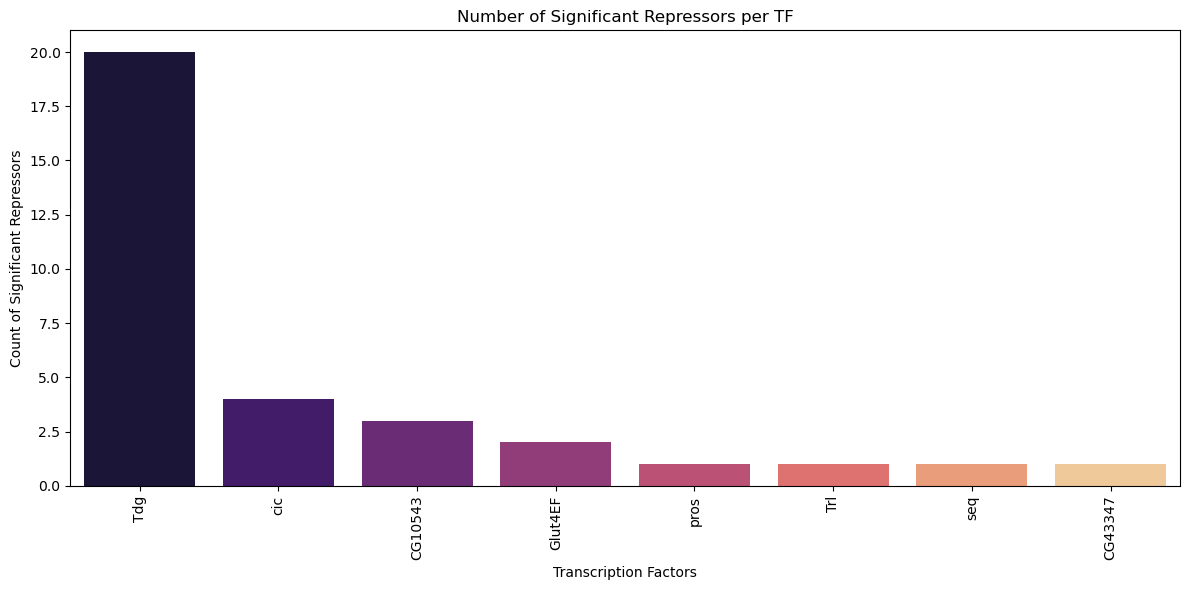

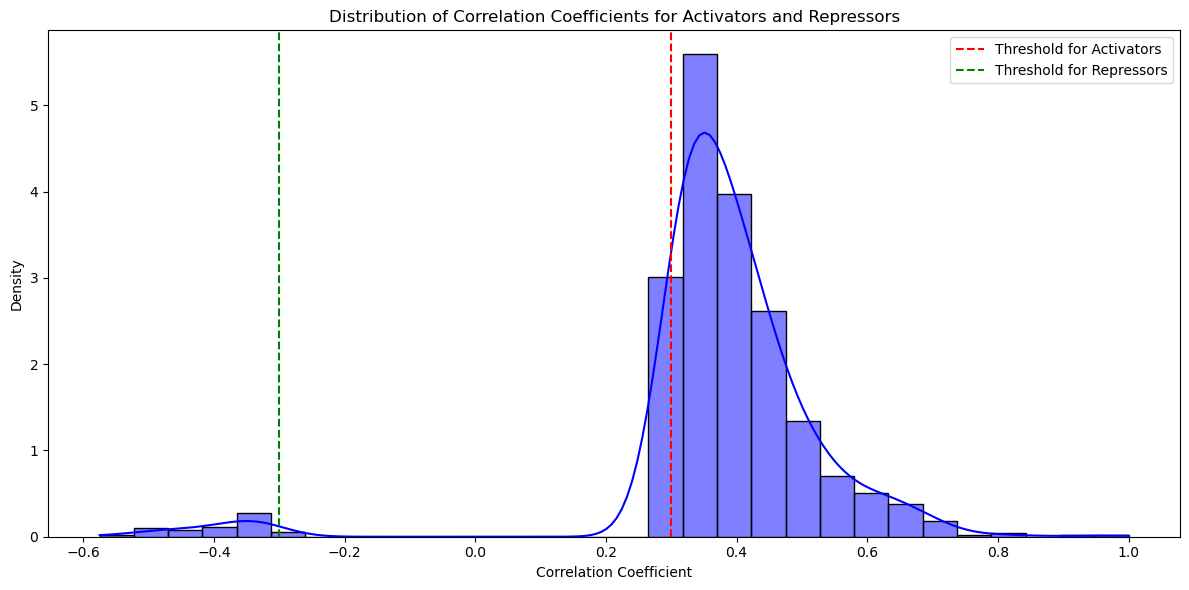

In [13]:
# Correlate the matrix with the TFs
correlations = pd.DataFrame({
    tf: gene_matrix.corrwith(tf_matrix[tf]) for tf in tf_matrix.columns
})
#See which TF-gene pairs have a correlation greater than 0.3 (activators)
activators = correlations[correlations > 0.3]
activators = activators.stack().reset_index()
activators.columns = ['Gene', 'TF', 'Correlation']
activators = activators[activators['Gene'] != activators['TF']]

#See which TF-gene pairs have a correlation less than -0.3 (repressors)
repressors = correlations[correlations < -0.3]
repressors = repressors.stack().reset_index()
repressors.columns = ['Gene', 'TF', 'Correlation']
repressors = repressors[repressors['Gene'] != repressors['TF']]

#A df including both activators and repressors
both = correlations[ (correlations > 0.3) | (correlations < -0.3) ]
both = both.stack().reset_index()
both.columns = ['Gene', 'TF', 'Correlation']
both = both[both['Gene'] != both['TF']]

#Visualizations
# Visualize how many (significant) activators and repressors we found per TF
plt.figure(figsize=(12, 6))
sns.countplot(data=activators, x='TF', order=activators['TF'].value_counts().index, palette='viridis')
plt.title('Number of Significant Activators per TF')
plt.xticks(rotation=90)
plt.xlabel('Transcription Factors')
plt.ylabel('Count of Significant Activators')
plt.tight_layout()
plt.show()
# Visualize how many (significant) repressors we found per TF
plt.figure(figsize=(12, 6))
sns.countplot(data=repressors, x='TF', order=repressors['TF'].value_counts().index, palette='magma')
plt.title('Number of Significant Repressors per TF')
plt.xticks(rotation=90)
plt.xlabel('Transcription Factors')
plt.ylabel('Count of Significant Repressors')
plt.tight_layout()
plt.show()
# Visualize the correlation distribution of both activators and repressors
plt.figure(figsize=(12, 6))
sns.histplot(both['Correlation'], bins=30, kde=True, color='blue', stat='density')
plt.title('Distribution of Correlation Coefficients for Activators and Repressors')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Density')
plt.axvline(x=0.3, color='red', linestyle='--', label='Threshold for Activators')
plt.axvline(x=-0.3, color='green', linestyle='--', label='Threshold for Repressors')
plt.legend()
plt.tight_layout()
plt.show()

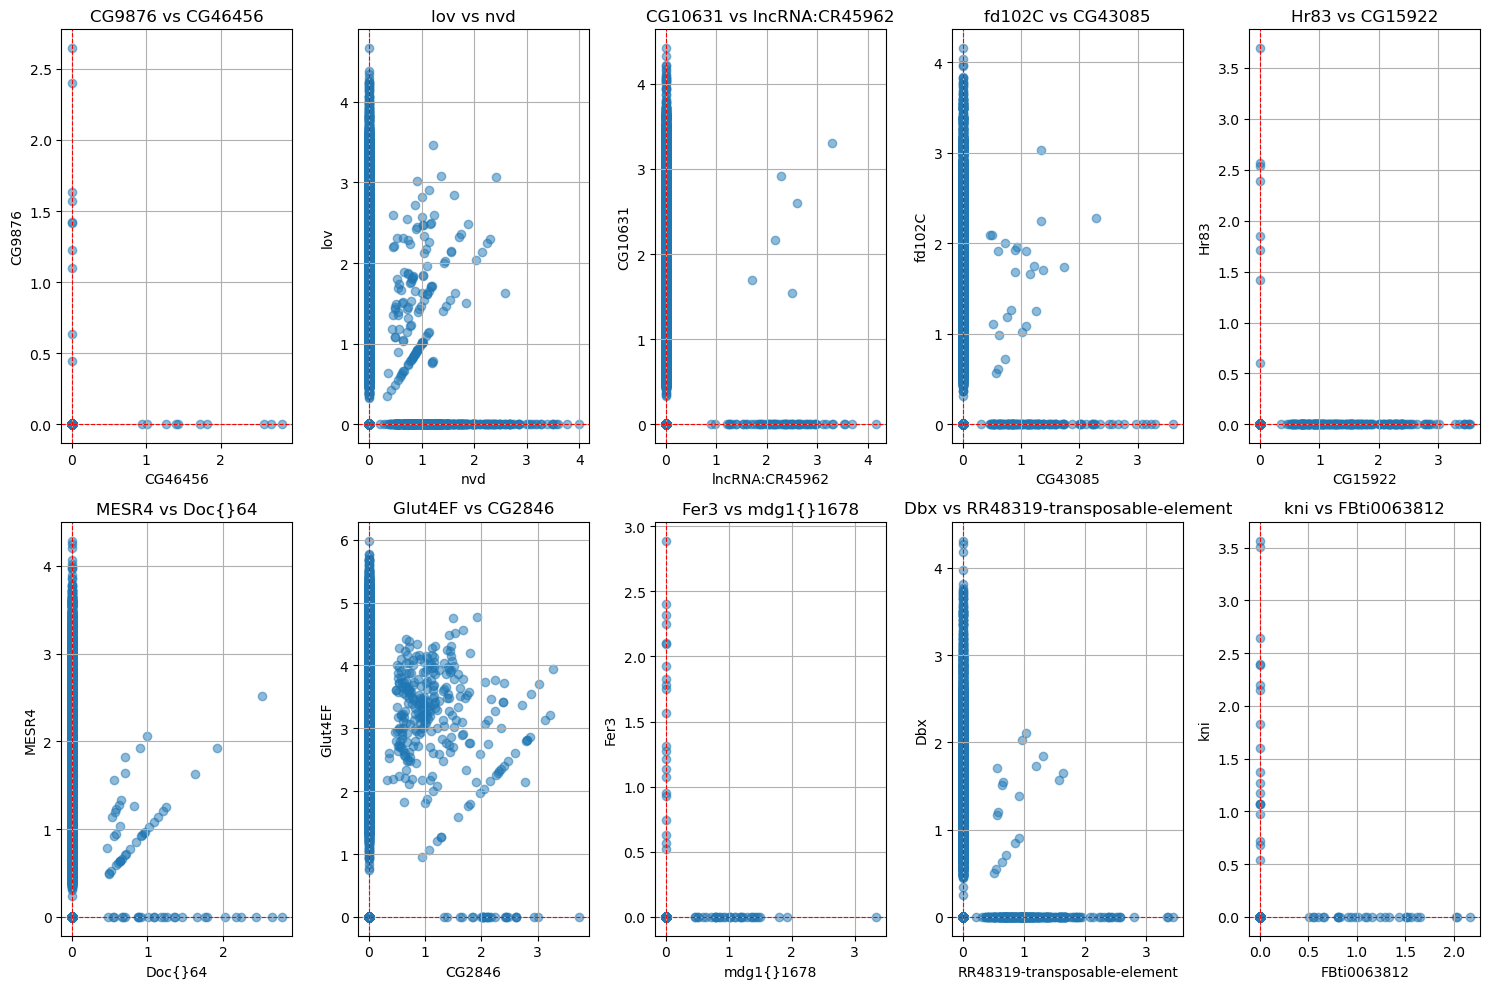

In [12]:
# Randomly select a few TFs to visualize
num_visualizations = 10  # Number of TFs to visualize
selected_TFs = random.sample(list(tf_matrix.columns.unique()), num_visualizations)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 10))  # Adjust rows and cols as needed
axes = axes.flatten()  # Flatten the 2D axes array to easily loop over

# Loop through TFs and create scatter plots in the subplots
for i, tf in enumerate(selected_TFs):
    selected_gene = random.sample(list(gene_matrix.columns), 1)[0]  # Randomly select one gene
    ax = axes[i]
    ax.scatter(gene_matrix[selected_gene], tf_matrix[tf], alpha=0.5)
    ax.set_title(f'{tf} vs {selected_gene}')
    ax.set_xlabel(f'{selected_gene}')
    ax.set_ylabel(f'{tf}')
    ax.axhline(0, color='red', linestyle='--', linewidth=0.8)  # Add a horizontal line at y=0
    ax.axvline(0, color='red', linestyle='--', linewidth=0.8)  # Add a vertical line at x=0
    ax.grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()